# Proyecto 1 - Etapa 1

## 1. Entendimiento de los Datos

En esta primera etapa, realizamos el perfilamiento de los datos y el análisis de calidad. Este proceso incluye:

- Exploración inicial del dataset.
- Identificación de datos faltantes y duplicados.
- Clasificación de variables en categóricas y numéricas.
- Identificación de valores atípicos y su impacto en el análisis.
- Visualización de la distribución de los datos.
- Justificación de transformaciones necesarias antes del preprocesamiento.

### 1.1 Carga de Datos

Trabajamos con los archivos **fake_news_spanish.csv** (entrenamiento) y **fake_news_test.csv** (prueba). Aseguramos la correcta lectura y almacenamiento de los datos.



In [21]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Definir rutas de los archivos
train_path = "fake_news_spanish.csv"
test_path = "fake_news_test.csv"

# Cargar los datos originales sin modificar con optimizaciones
df_train_original = pd.read_csv(train_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})
df_test_original = pd.read_csv(test_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})

# Crear copias para trabajar
df_train = df_train_original.copy()
df_test = df_test_original.copy()

# Convertir 'Fecha' a formato datetime
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Exploración inicial
print("Dimensiones del dataset de entrenamiento:")
print(f"Filas: {df_train.shape[0]}, Columnas: {df_train.shape[1]}")

# Información general del dataset
df_train.info()




Dimensiones del dataset de entrenamiento:
Filas: 57063, Columnas: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           57063 non-null  object        
 1   Label        57063 non-null  int64         
 2   Titulo       57047 non-null  object        
 3   Descripcion  57063 non-null  object        
 4   Fecha        21740 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ MB


### 1.2 Exploración Inicial

Analizamos la estructura del dataset y verificamos información básica sobre las variables disponibles.

- Contamos el número de valores únicos por columna.
- Identificamos valores faltantes y registros duplicados.
- Clasificamos las variables en numéricas y categóricas.

Los resultados de este análisis nos ayudarán a definir las estrategias de preprocesamiento en la siguiente fase.


In [22]:
# Convertir 'Fecha' a formato datetime sin imputar valores nulos
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Contar valores únicos por columna
print("\nValores únicos por columna:")
print(df_train.nunique())

# Identificación de valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Identificación de registros duplicados considerando título y descripción
duplicados = df_train.duplicated(subset=['Titulo', 'Descripcion']).sum()
print(f"\nRegistros duplicados en 'Titulo' y 'Descripcion': {duplicados}")

# Clasificación de variables corregida
num_vars = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = df_train.select_dtypes(include=["object"]).columns.tolist()

# Excluir 'ID' de categóricas porque no aporta información útil
if 'ID' in cat_vars:
    cat_vars.remove('ID')

print(f"\nVariables numéricas: {num_vars}")
print(f"Variables categóricas: {cat_vars}")



Valores únicos por columna:
ID                 1
Label              2
Titulo         51604
Descripcion    49638
Fecha            906
dtype: int64

Valores nulos por columna:
ID                 0
Label              0
Titulo            16
Descripcion        0
Fecha          35323
dtype: int64

Registros duplicados en 'Titulo' y 'Descripcion': 450

Variables numéricas: ['Label']
Variables categóricas: ['Titulo', 'Descripcion']


### 1.3 Estadísticas Descriptivas

Para comprender mejor la distribución de los datos, generamos estadísticas generales de las variables numéricas y categóricas.

### 1.4 Visualización de Datos

Para observar la distribución de la variable objetivo y la longitud de los títulos, generamos los siguientes gráficos:

1. **Distribución de la variable objetivo (noticias falsas vs. reales).**
2. **Histograma de la longitud de los títulos.**
3. **Detección de valores atípicos en la longitud de los títulos.**
4. **Nube de palabras en los títulos de noticias.**

Estas visualizaciones nos permitirán detectar posibles sesgos en los datos y definir estrategias de transformación.



Estadísticas descriptivas para variables numéricas:
              Label                          Fecha
count  57063.000000                          21740
mean       0.581077  2020-08-03 05:41:15.289788416
min        0.000000            2016-02-01 00:00:00
25%        0.000000            2019-04-04 18:00:00
50%        1.000000            2020-06-06 00:00:00
75%        1.000000            2021-12-04 00:00:00
max        1.000000            2024-12-11 00:00:00
std        0.493387                            NaN

Estadísticas descriptivas para variables categóricas:
           ID                                             Titulo  \
count   57063                                              57047   
unique      1                                              51604   
top        ID  Escándalo de corrupción salpica a líderes sind...   
freq    57063                                                  6   

                                              Descripcion  
count                           

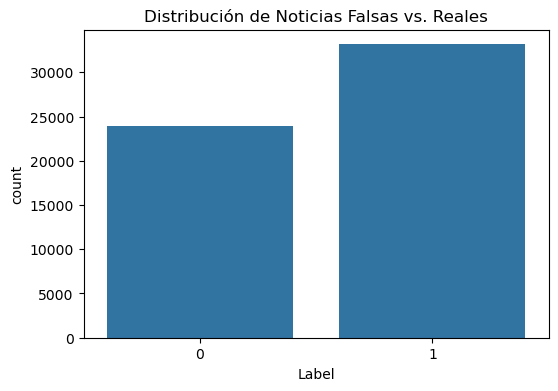

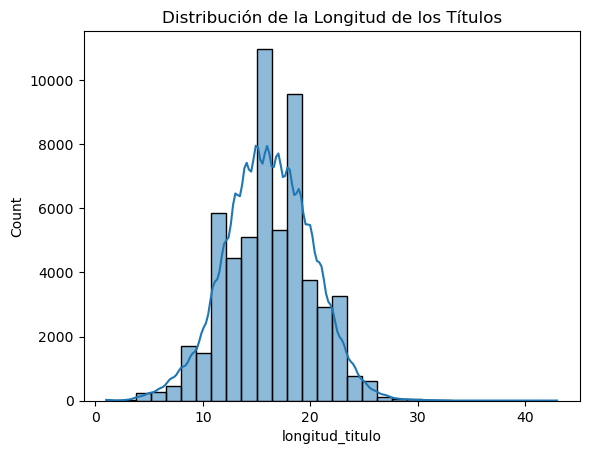

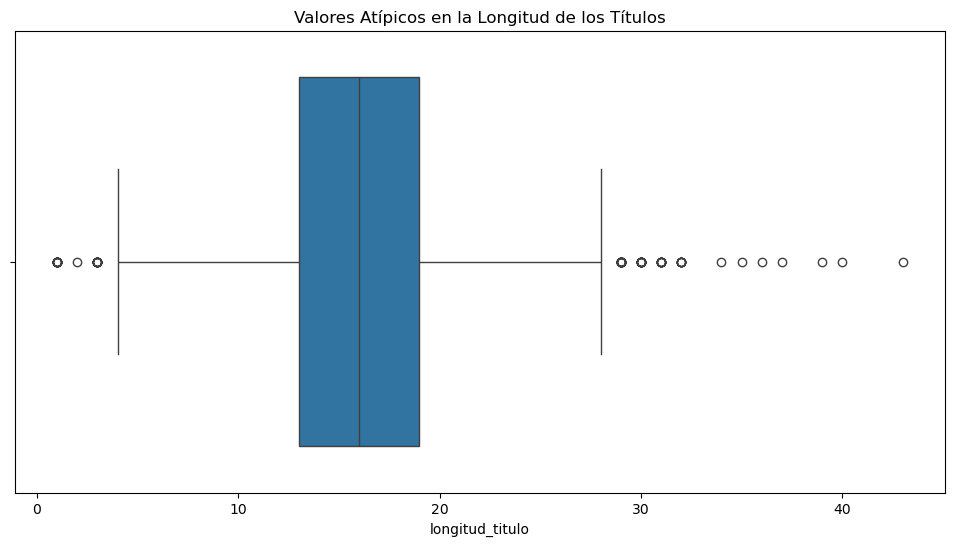

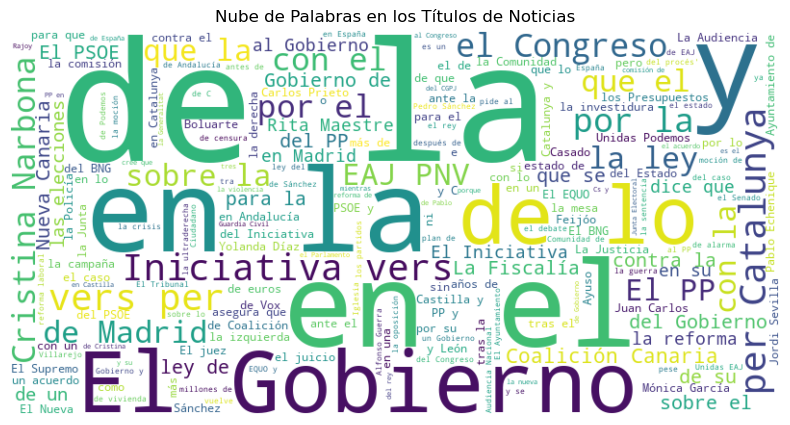

In [23]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df_train.describe())

print("\nEstadísticas descriptivas para variables categóricas:")
print(df_train.describe(include=["O"]))

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x="Label", data=df_train)
plt.title("Distribución de Noticias Falsas vs. Reales")
plt.show()

# Análisis de la longitud de los títulos
df_train["longitud_titulo"] = df_train["Titulo"].apply(lambda x: len(str(x).split()))
sns.histplot(df_train["longitud_titulo"], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Títulos")
plt.show()

# Identificación de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["longitud_titulo"])
plt.title("Valores Atípicos en la Longitud de los Títulos")
plt.show()

# WordCloud para analizar palabras más frecuentes en los títulos
text = " ".join(df_train["Titulo"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras en los Títulos de Noticias")
plt.show()


## 2. Preparación de los Datos

En esta sección, realizamos la preparación de los datos asegurando su calidad y consistencia antes de ser utilizados en el modelo. Siguiendo los principios de calidad de datos, nos enfocamos en:

- **Completitud**: Manejo de valores nulos y eliminación de registros irrelevantes.
- **Unicidad**: Eliminación de duplicados en títulos y descripciones.
- **Consistencia**: Transformación de texto a formato uniforme (minúsculas, sin caracteres especiales).
- **Validez**: Conversión de variables a su tipo adecuado.
- **Adecuación**: Procesamiento específico para análisis de texto.

A continuación, aplicamos estas transformaciones.

In [24]:
# Eliminación de valores nulos en títulos (son pocos y el texto es clave)
df_train = df_train.dropna(subset=['Titulo'])

# Eliminación de registros duplicados basados en título y descripción
df_train = df_train.drop_duplicates(subset=['Titulo', 'Descripcion'])

# Verificar cambios
print(f"Datos después de limpiar nulos y duplicados: {df_train.shape}")


Datos después de limpiar nulos y duplicados: (56597, 6)


### 2.1 Normalización del Texto

Dado que nuestro modelo se basará en análisis de texto, es crucial limpiar y normalizar los datos. Aplicamos:

1. **Conversión a minúsculas**: Para evitar distinciones innecesarias entre palabras con mayúsculas o minúsculas.
2. **Eliminación de caracteres especiales y puntuación**: Para reducir ruido en los datos.
3. **Eliminación de stopwords**: Para eliminar palabras irrelevantes en la clasificación.
4. **Lematización**: Para convertir palabras a su forma raíz, mejorando la representación del texto.

A continuación, implementamos estos pasos.


In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar stopwords en caso de que no estén disponibles
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar herramientas de procesamiento
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def limpiar_texto(texto):
    """Aplica limpieza y normalización a un texto."""
    texto = texto.lower()  # Minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar caracteres especiales
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]  # Eliminar stopwords
    palabras = [lemmatizer.lemmatize(word) for word in palabras]  # Lematización
    return ' '.join(palabras)

# Aplicar a los textos
df_train['Titulo'] = df_train['Titulo'].apply(limpiar_texto)
df_train['Descripcion'] = df_train['Descripcion'].apply(limpiar_texto)

# Verificamos el resultado en algunas filas
df_train[['Titulo', 'Descripcion']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Titulo,Descripcion
0,the guardian va sánchez europa necesita apuest...,diario británico publicó pasado jueves editori...
1,revelan gobierno negocio liberación mireles ca...,revelan gobierno negocio liberación mireles ca...
2,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castelló fiesta grande c...
3,iglesias alienta yolanda díaz erc eh bildu neg...,política igual negociar empresarios negociar g...
4,puigdemont ninguna tragedia repetición elecciones,entrevista punt avui líder jxcat desdramatizad...


### 2.2 Vectorización de Texto

Dado que los modelos de machine learning requieren datos numéricos, transformamos los textos en representaciones vectoriales utilizando:

- **TF-IDF (Term Frequency - Inverse Document Frequency)**: Método que pondera la importancia de las palabras en el conjunto de datos.
- **CountVectorizer**: Cuenta la frecuencia de aparición de las palabras.

Aquí implementamos la vectorización.


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Vectorización con TF-IDF para Título y Descripción
vectorizer_titulo = TfidfVectorizer(max_features=5000)
vectorizer_descripcion = TfidfVectorizer(max_features=5000)

X_titulo = vectorizer_titulo.fit_transform(df_train['Titulo'])
X_descripcion = vectorizer_descripcion.fit_transform(df_train['Descripcion'])

# Concatenar representaciones en una sola matriz de características
from scipy.sparse import hstack

X = hstack([X_titulo, X_descripcion])
y = df_train['Label']

# Verificar dimensiones después de la transformación
print(f"Dimensiones de la matriz de características: {X.shape}")


Dimensiones de la matriz de características: (56597, 10000)


### 2.3 División en Conjuntos de Entrenamiento y Prueba

Para evaluar el desempeño del modelo, dividimos los datos en conjuntos de entrenamiento y prueba. Usamos un 80% de los datos para entrenar y el 20% restante para evaluar.


In [27]:
from sklearn.model_selection import train_test_split

# División en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar distribución de clases
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Distribución en el conjunto de entrenamiento:
Label
1    0.578417
0    0.421583
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
Label
1    0.578445
0    0.421555
Name: proportion, dtype: float64


## Conclusión de la Preparación de Datos

Después de completar esta fase, obtenemos datos limpios, transformados y adecuados para el modelado. Los pasos clave incluyeron:

- Eliminación de valores nulos y duplicados.
- Normalización del texto (minúsculas, eliminación de caracteres especiales, lematización).
- Vectorización de texto mediante **TF-IDF**.
- División en conjuntos de **entrenamiento y prueba**.

Ahora estamos listos para construir y evaluar nuestro modelo de clasificación.
